<a href="https://colab.research.google.com/github/npovey/unet4/blob/master/UNET4_Copy1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3Aietf%3Awg%3Aoauth%3A2.0%3Aoob&scope=email%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdocs.test%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive.photos.readonly%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fpeopleapi.readonly&response_type=code

Enter your authorization code:
··········
Mounted at /content/drive


In [3]:
import os

import zipfile
import random
import tensorflow as tf
from tensorflow.keras.optimizers import RMSprop
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from shutil import copyfile
import numpy as np

import matplotlib.pyplot as plt
import matplotlib.image as mpimg
from keras.layers import Concatenate
from keras.models import Sequential
import keras
from keras.layers import Conv2D, MaxPooling2D, Input, Dense
from keras.models import Model
import matplotlib.image as mpimg
from glob import glob

Using TensorFlow backend.


In [0]:
# print(len(os.listdir('/Users/np/Desktop/tmp/sparse-v-ndct/training/sparse/')))
# print(len(os.listdir('/Users/np/Desktop/tmp/sparse-v-ndct/training/ndct/')))
# # 3558
# # 3558

In [4]:
print(len(os.listdir('/content/drive/My Drive/Colab Notebooks/sparse-v-ndct/training/sparse/')))
print(len(os.listdir('/content/drive/My Drive/Colab Notebooks/sparse-v-ndct/training/ndct/')))
# 3558
# 3558

3558
3558


In [5]:
print(len(os.listdir('/content/drive/My Drive/Colab Notebooks/sparse-v-ndct/testing/sparse/')))
print(len(os.listdir('/content/drive/My Drive/Colab Notebooks/sparse-v-ndct/testing/ndct/')))
# 396
# 396

396
396


In [0]:
from glob import glob
ldct = sorted(glob( '/content/drive/My Drive/Colab Notebooks/sparse-v-ndct/training/sparse/*'))
ndct = sorted(glob( '/content/drive/My Drive/Colab Notebooks/sparse-v-ndct/training/ndct/*'))

ldct_test = sorted(glob( '/content/drive/My Drive/Colab Notebooks/sparse-v-ndct/testing/sparse/*'))
ndct_test = sorted(glob( '/content/drive/My Drive/Colab Notebooks/sparse-v-ndct/testing/ndct/*'))



In [30]:


# example of horizontal shift image augmentation
from numpy import expand_dims
from keras.preprocessing.image import load_img
from keras.preprocessing.image import img_to_array
from keras.preprocessing.image import ImageDataGenerator
from matplotlib import pyplot
# load the image
ndct_imgs_train = []
#for i in range(0, len(ndct)):
for i in range(0, 500):
     # convert to numpy array
    img = load_img(ndct[i])
    data = img_to_array(img)
    array = np.array(img)
    #print(array.shape)
    #print(data[:][0][:].shape)
      # expand dimension to one sample
    #samples = expand_dims(data, 0)
    #ndct_imgs_train.append(samples)
    ndct_imgs_train.append(data)
print(len(ndct_imgs_train))

ldct_imgs_train = []
#for i in range(0, len(ndct)):
for i in range(0, 500):
    img = load_img(ldct[i])
      # convert to numpy array
    data = img_to_array(img)
      # expand dimension to one sample
    #samples = expand_dims(data, 0)
    ldct_imgs_train.append(data)
print(len(ldct_imgs_train))


# load the image
ndct_imgs_test = []
#for i in range(0, len(ndct_test)):
for i in range(0, 100):
    
    img = load_img(ndct_test[i])
      # convert to numpy array
    data = img_to_array(img)
    
      # expand dimension to one sample
    #samples = expand_dims(data, 0)
    ndct_imgs_test.append(data)
print(len(ndct_imgs_test))

ldct_imgs_test = []
#for i in range(0, len(ldct_test)):
for i in range(0, 100):
    img = load_img(ldct_test[i])
      # convert to numpy array
    data = img_to_array(img)
      # expand dimension to one sample
    #samples = expand_dims(data, 0)
    ldct_imgs_test.append(data)
print(len(ldct_imgs_test))






500
500
100
100


In [31]:
k1 = np.asarray(ldct_imgs_train)
k2 = np.asarray(ndct_imgs_train)
k1 = k1[:,:,:,0]
k2 = k2[:,:,:,0]
k1 = k1.reshape(500,512,512,1)
k2 = k2.reshape(500,512,512,1)
print(k1.shape)
print(k2.shape)
k3 = np.asarray(ldct_imgs_test)
k4 = np.asarray(ndct_imgs_test)
k3 = k3[:,:,:,0]
k4 = k4[:,:,:,0]
k3 = k3.reshape(100,512,512,1) 
k4 = k4.reshape(100,512,512,1)
print(k3.shape)
print(k4.shape)



(500, 512, 512, 1)
(500, 512, 512, 1)
(100, 512, 512, 1)
(100, 512, 512, 1)


In [0]:
class LossHistory(keras.callbacks.Callback):
    def on_train_begin(self, logs={}):
        self.losses = []

    def on_batch_end(self, batch, logs={}):
        self.losses.append(logs.get('loss'))
history = LossHistory()

In [33]:
# https://www.kaggle.com/jesperdramsch/intro-chest-xray-dicom-viz-u-nets-full-data
from keras.layers.convolutional import Conv2DTranspose
from keras.layers import concatenate

inputs = Input((None, None,1))

c1 = Conv2D(8, (3, 3), activation='relu', padding='same') (inputs)
c1 = Conv2D(8, (3, 3), activation='relu', padding='same') (c1)
p1 = MaxPooling2D((2, 2)) (c1)

c2 = Conv2D(16, (3, 3), activation='relu', padding='same') (p1)
c2 = Conv2D(16, (3, 3), activation='relu', padding='same') (c2)
p2 = MaxPooling2D((2, 2)) (c2)

c3 = Conv2D(32, (3, 3), activation='relu', padding='same') (p2)
c3 = Conv2D(32, (3, 3), activation='relu', padding='same') (c3)
p3 = MaxPooling2D((2, 2)) (c3)

c4 = Conv2D(64, (3, 3), activation='relu', padding='same') (p3)
c4 = Conv2D(64, (3, 3), activation='relu', padding='same') (c4)
p4 = MaxPooling2D(pool_size=(2, 2)) (c4)

c5 = Conv2D(64, (3, 3), activation='relu', padding='same') (p4)
c5 = Conv2D(64, (3, 3), activation='relu', padding='same') (c5)
p5 = MaxPooling2D(pool_size=(2, 2)) (c5)

c55 = Conv2D(128, (3, 3), activation='relu', padding='same') (p5)
c55 = Conv2D(128, (3, 3), activation='relu', padding='same') (c55)

u6 = Conv2DTranspose(64, (2, 2), strides=(2, 2), padding='same') (c55)
u6 = concatenate([u6, c5])
c6 = Conv2D(64, (3, 3), activation='relu', padding='same') (u6)
c6 = Conv2D(64, (3, 3), activation='relu', padding='same') (c6)

u71 = Conv2DTranspose(32, (2, 2), strides=(2, 2), padding='same') (c6)
u71 = concatenate([u71, c4])
c71 = Conv2D(32, (3, 3), activation='relu', padding='same') (u71)
c61 = Conv2D(32, (3, 3), activation='relu', padding='same') (c71)

u7 = Conv2DTranspose(32, (2, 2), strides=(2, 2), padding='same') (c61)
u7 = concatenate([u7, c3])
c7 = Conv2D(32, (3, 3), activation='relu', padding='same') (u7)
c7 = Conv2D(32, (3, 3), activation='relu', padding='same') (c7)

u8 = Conv2DTranspose(16, (2, 2), strides=(2, 2), padding='same') (c7)
u8 = concatenate([u8, c2])
c8 = Conv2D(16, (3, 3), activation='relu', padding='same') (u8)
c8 = Conv2D(16, (3, 3), activation='relu', padding='same') (c8)

u9 = Conv2DTranspose(8, (2, 2), strides=(2, 2), padding='same') (c8)
u9 = concatenate([u9, c1], axis=3)
c9 = Conv2D(8, (3, 3), activation='relu', padding='same') (u9)
c9 = Conv2D(8, (3, 3), activation='relu', padding='same') (c9)

#output_img = Conv2D(1, (1, 1), activation='sigmoid') (c9)
output_img = Conv2D(1, (1, 1)) (c9)
subtracted = keras.layers.Subtract()([inputs, output_img])


model = Model(inputs=[inputs], outputs=[subtracted])
#model.compile(optimizer='adam', loss='binary_crossentropy', metrics=[dice_coef])
model.compile(optimizer='adam', loss='mse', metrics=['acc'])

model.summary()

__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_2 (InputLayer)            (None, None, None, 1 0                                            
__________________________________________________________________________________________________
conv2d_24 (Conv2D)              (None, None, None, 8 80          input_2[0][0]                    
__________________________________________________________________________________________________
conv2d_25 (Conv2D)              (None, None, None, 8 584         conv2d_24[0][0]                  
__________________________________________________________________________________________________
max_pooling2d_6 (MaxPooling2D)  (None, None, None, 8 0           conv2d_25[0][0]                  
__________________________________________________________________________________________________
conv2d_26 

In [34]:
model.fit(k1, k2, validation_split=.2, batch_size=32, epochs=20,callbacks=[history])


Train on 400 samples, validate on 100 samples
Epoch 1/20
400/400 [==============================] - 15s 37ms/step - loss: 249.5931 - acc: 0.0914 - val_loss: 257.7710 - val_acc: 0.1131
Epoch 2/20
400/400 [==============================] - 9s 23ms/step - loss: 226.5507 - acc: 0.1052 - val_loss: 238.5001 - val_acc: 0.1071
Epoch 3/20
400/400 [==============================] - 9s 23ms/step - loss: 202.3050 - acc: 0.0793 - val_loss: 188.7501 - val_acc: 0.0529
Epoch 4/20
400/400 [==============================] - 9s 22ms/step - loss: 167.2731 - acc: 0.0664 - val_loss: 174.2425 - val_acc: 0.0610
Epoch 5/20
400/400 [==============================] - 9s 22ms/step - loss: 155.4700 - acc: 0.0672 - val_loss: 169.6814 - val_acc: 0.0520
Epoch 6/20
400/400 [==============================] - 9s 22ms/step - loss: 155.3155 - acc: 0.0661 - val_loss: 149.2110 - val_acc: 0.0649
Epoch 7/20
400/400 [==============================] - 9s 22ms/step - loss: 143.8605 - acc: 0.0680 - val_loss: 146.7546 - val_acc: 0

In [35]:
print(history.losses)

[268.3999, 299.4173, 256.41965, 251.31274, 243.3497, 225.20969, 244.24191, 248.68494, 253.61978, 243.42935, 246.55551, 235.29468, 207.95786, 249.49432, 208.14209, 222.14136, 241.52933, 243.20953, 230.36829, 219.27417, 209.67493, 205.45734, 262.08728, 206.72719, 233.45938, 200.63821, 206.18188, 196.96323, 246.99435, 224.82314, 228.40187, 197.34552, 181.92575, 201.93596, 187.18852, 191.79047, 195.5975, 175.19211, 188.94415, 153.23224, 187.4935, 186.08484, 156.65436, 164.27051, 164.83672, 156.29153, 186.36417, 146.48724, 162.33649, 196.4036, 141.39201, 178.13242, 145.3161, 140.57971, 146.97473, 157.72244, 168.30887, 140.71811, 172.15324, 162.26572, 158.1073, 153.45602, 183.49753, 139.82404, 148.90308, 177.99014, 182.8755, 167.89603, 154.67453, 186.33707, 154.68115, 150.74097, 114.99681, 150.25801, 125.72295, 158.86562, 145.0273, 142.75626, 116.5087, 138.50743, 148.77563, 131.90976, 161.44583, 143.51457, 167.73123, 146.61731, 172.85724, 128.29422, 151.90366, 131.1511, 118.07893, 135.80313,

In [36]:
model.evaluate(k3, k4)

100/100 [==============================] - 1s 7ms/step


[155.6015576171875, 0.08737545013427735]

In [37]:
for layer in model.layers:
    print(layer.output_shape)

(None, None, None, 1)
(None, None, None, 8)
(None, None, None, 8)
(None, None, None, 8)
(None, None, None, 16)
(None, None, None, 16)
(None, None, None, 16)
(None, None, None, 32)
(None, None, None, 32)
(None, None, None, 32)
(None, None, None, 64)
(None, None, None, 64)
(None, None, None, 64)
(None, None, None, 64)
(None, None, None, 64)
(None, None, None, 64)
(None, None, None, 128)
(None, None, None, 128)
(None, None, None, 64)
(None, None, None, 128)
(None, None, None, 64)
(None, None, None, 64)
(None, None, None, 32)
(None, None, None, 96)
(None, None, None, 32)
(None, None, None, 32)
(None, None, None, 32)
(None, None, None, 64)
(None, None, None, 32)
(None, None, None, 32)
(None, None, None, 16)
(None, None, None, 32)
(None, None, None, 16)
(None, None, None, 16)
(None, None, None, 8)
(None, None, None, 16)
(None, None, None, 8)
(None, None, None, 8)
(None, None, None, 1)
(None, None, None, 1)


In [38]:
model.summary()

__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_2 (InputLayer)            (None, None, None, 1 0                                            
__________________________________________________________________________________________________
conv2d_24 (Conv2D)              (None, None, None, 8 80          input_2[0][0]                    
__________________________________________________________________________________________________
conv2d_25 (Conv2D)              (None, None, None, 8 584         conv2d_24[0][0]                  
__________________________________________________________________________________________________
max_pooling2d_6 (MaxPooling2D)  (None, None, None, 8 0           conv2d_25[0][0]                  
__________________________________________________________________________________________________
conv2d_26 

In [0]:
def cal_psnr(im1, im2):
    # assert pixel value range is 0-255 and type is uint8
    mse = ((im1.astype(np.float) - im2.astype(np.float)) ** 2).mean()
    maxval = np.amax(im1)
    psnr = 10 * np.log10(maxval ** 2 / mse)
    return psnr

In [0]:
reconstructed = model.predict(k3)
# mse = ((k4.astype(np.float) - reconstructed.astype(np.float)) ** 2).mean()
# psnr = 10 * np.log10(255 ** 2 / mse)
# print(psnr)

In [41]:
psnr = cal_psnr(k4, reconstructed)
print(psnr)

26.210664112212406


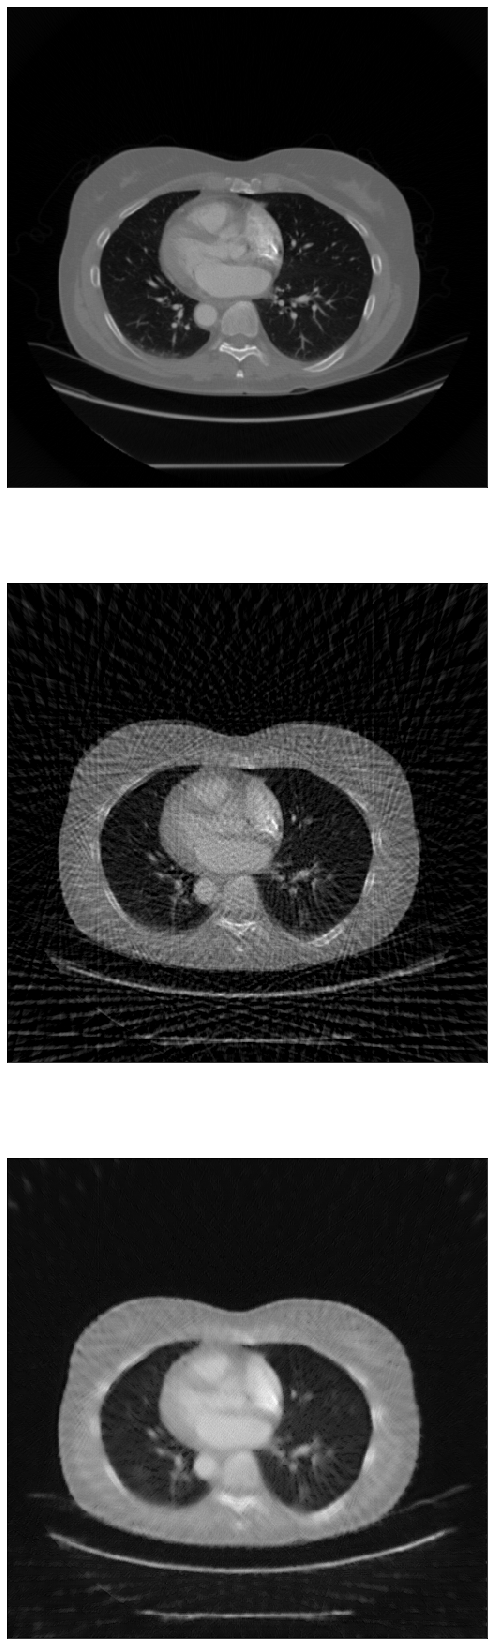

In [42]:
n = 1
plt.figure(figsize=(30, 30))

images = model.predict(k3)

for i in range(n):
    # plot original image
    ax = plt.subplot(3, n, i + 1)
    plt.imshow(k4[i].reshape(512, 512))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
    if i == n/2:
        ax.set_title('Original Images')

    # plot noisy image 
    ax = plt.subplot(3, n, i + 1 + n)
    plt.imshow(k3[i].reshape(512, 512))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
    if i == n/2:
        ax.set_title('Noisy Input')
        
    # plot noisy image 
    ax = plt.subplot(3, n, i + 1 + 2*n)
    plt.imshow(images[i].reshape(512, 512))

    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
    if i == n/2:
        ax.set_title('Autoencoder Output')

In [0]:
# import matplotlib.pyplot as plt
# acc = history.history['acc']
# val_acc = history.history['val_acc']
# loss = history.history['loss']
# val_loss = history.history['val_loss']

# epochs = range(len(acc))

# plt.plot(epochs, acc, 'r', label='Training accuracy')
# plt.plot(epochs, val_acc, 'b', label='Validation accuracy')
# plt.title('Training and validation accuracy')
# plt.legend()
# plt.figure()

# plt.plot(epochs, loss, 'r', label='Training Loss')
# plt.plot(epochs, val_loss, 'b', label='Validation Loss')
# plt.title('Training and validation loss')
# plt.legend()

# plt.show()

In [0]:
def plot_autoencoder_outputs(autoencoder, n, dims):
    decoded_imgs = autoencoder.predict(k3)

    # number of example digits to show
    #n = 5
    plt.figure(figsize=(100, 40.5))
    for i in range(n):
        # plot original image
        ax = plt.subplot(2, n, i + 1)
        plt.imshow(k4[i].reshape(*dims))
        plt.gray()
        ax.get_xaxis().set_visible(False)
        ax.get_yaxis().set_visible(False)
        if i == n/2:
            ax.set_title('Original Images')

        # plot reconstruction 
        ax = plt.subplot(2, n, i + 1 + n)
        plt.imshow(decoded_imgs[i].reshape(*dims))
        plt.gray()
        ax.get_xaxis().set_visible(False)
        ax.get_yaxis().set_visible(False)
        if i == n/2:
            ax.set_title('Reconstructed Images')
    plt.show()

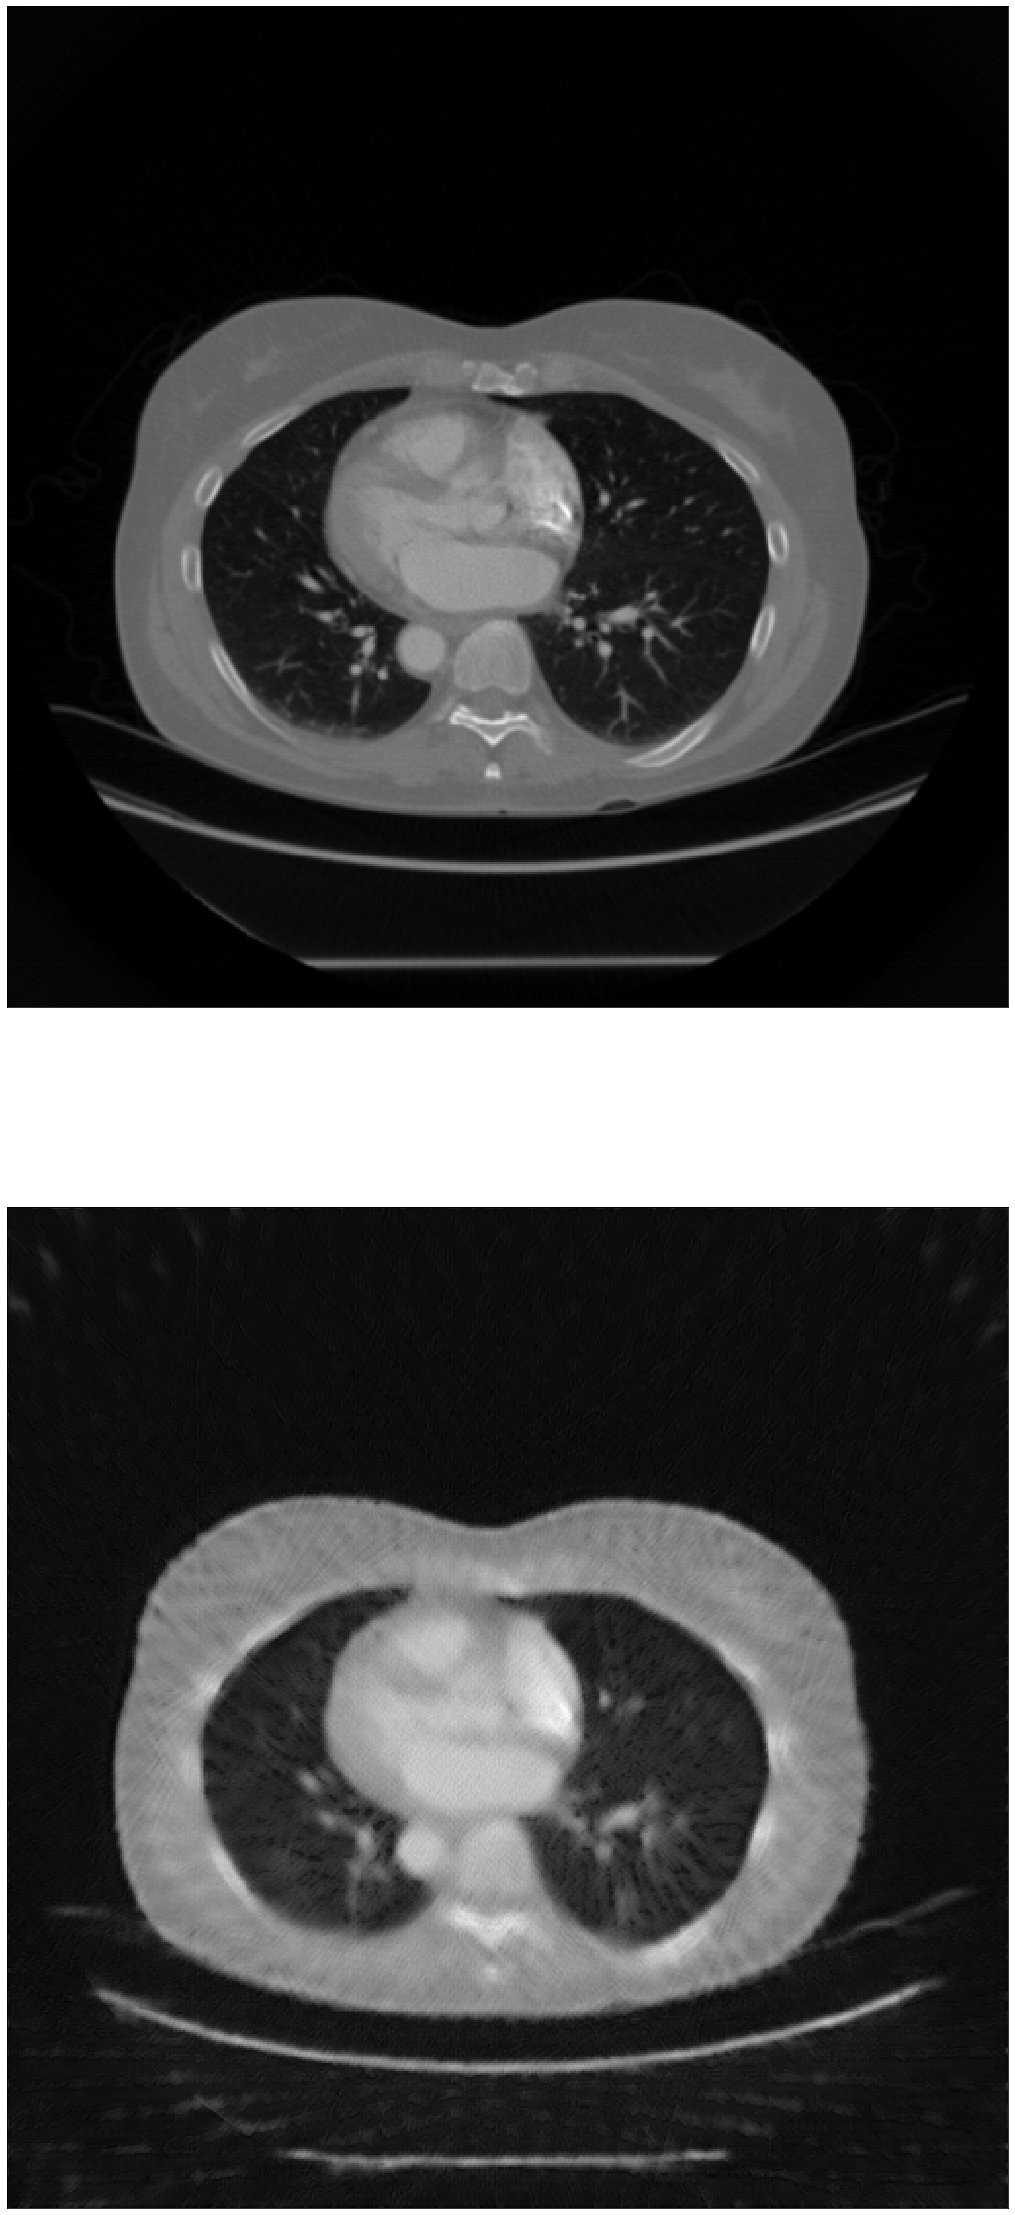

In [44]:
plot_autoencoder_outputs(model, 1, (512, 512))



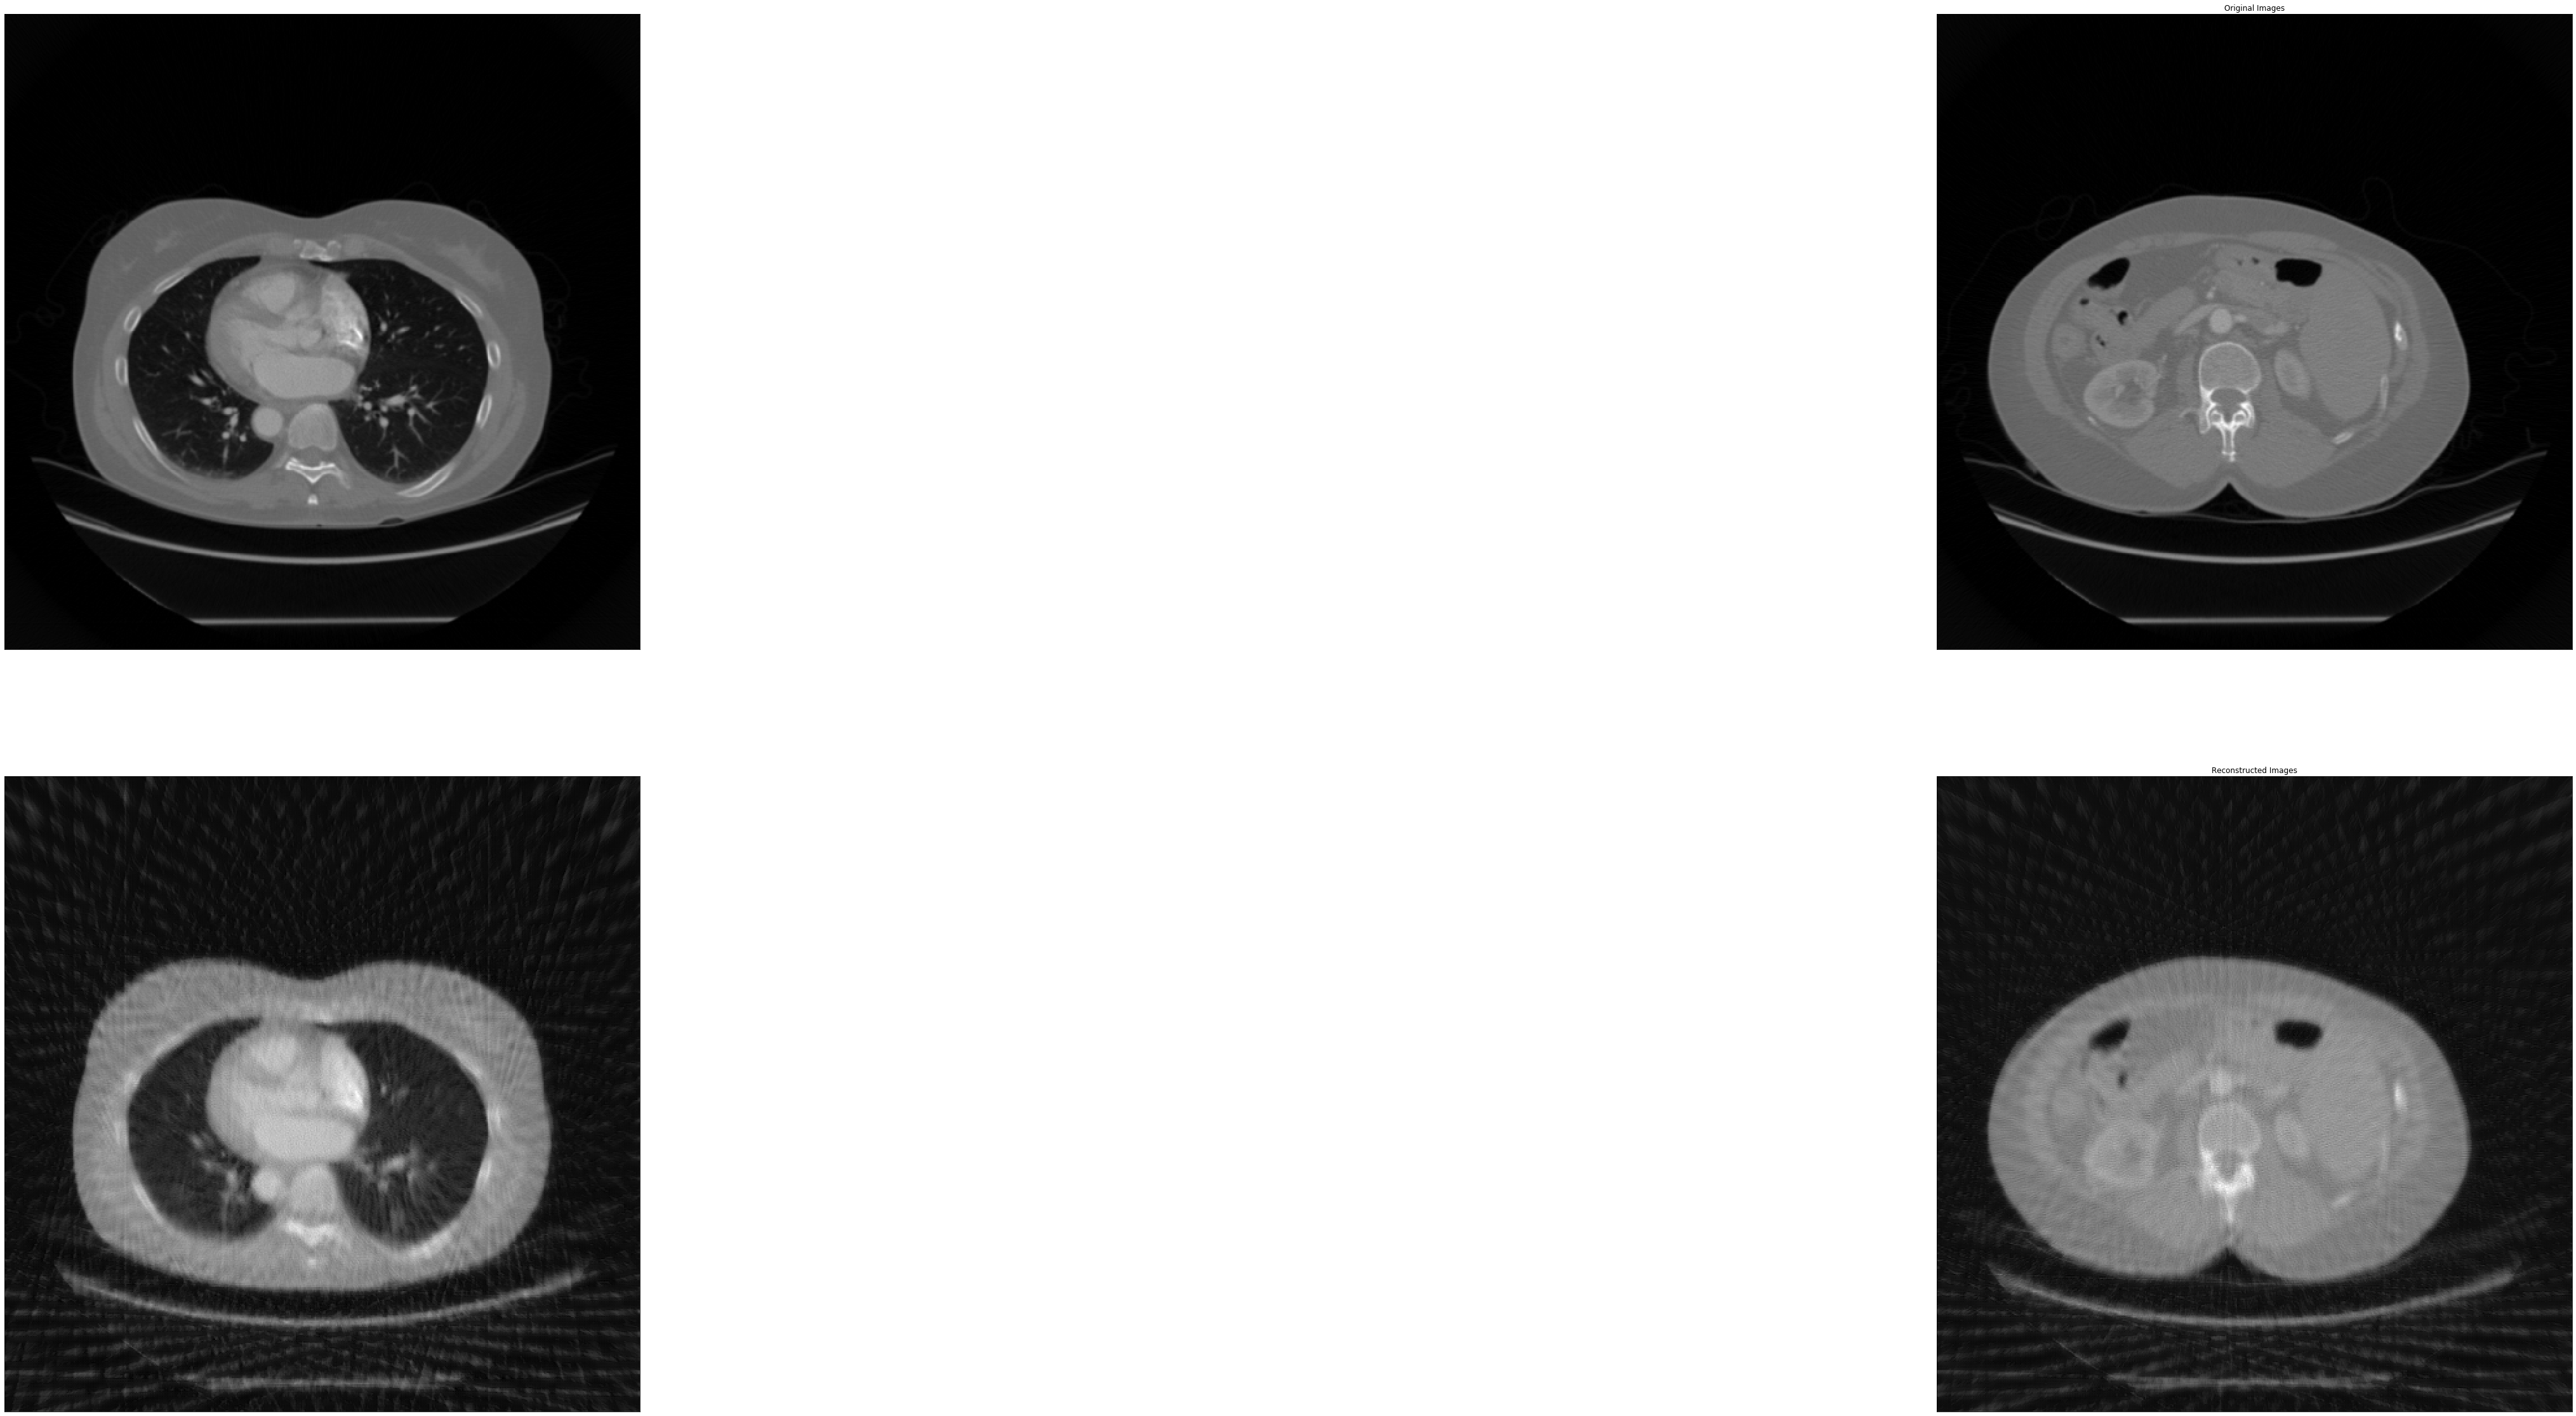

In [0]:
plot_autoencoder_outputs(model, 2, (512, 512))

